# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Autoencoders for Anomaly Detection

**Steps**:
1. Data Set: Download a dataset of electricity consumption data.
2. Build an Autoencoder: Construct a simple autoencoder using a neural network for the
normal consumption data.
3. Identify Anomalies: Use the trained model to reconstruct the data and identify anomalies based on reconstruction error.
4. Visualize: Plot both the actual and reconstructed data to highlight anomalies.

2025-05-14 14:08:00.379628: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 14:08:00.383914: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-05-14 14:08:00.399525: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747231680.420745   14027 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747231680.426819   14027 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1747231680.440930   14027 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

Epoch 1/50


2025-05-14 14:08:02.363148: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8472
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2565 
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0014 
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.3128e-04 
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3010e-05 
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.6459e-05 
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.4764e-05 
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.0242e-05 
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2561e-05 
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7352e-05 
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.1643e-05 
Epoch 13/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2675e-05 
Epoch 14/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4637e-06 
Epoch 15/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1

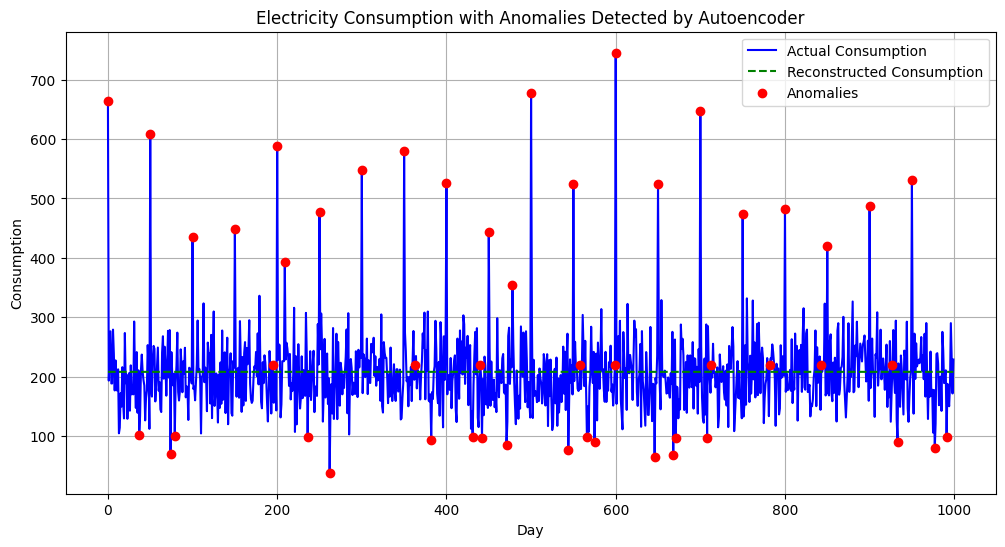

Detected Anomalies: 50


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import Sequential

# Step 1: Data loading and preprocessing function
def load_data():
    """
    Generate synthetic electricity consumption data and preprocess it.
    """
    np.random.seed(42)
    days = np.arange(1000)
    consumption = np.random.normal(loc=200, scale=50, size=1000)  # Normal consumption (mean=200, std=50)

    # Introduce anomalies (e.g., server lag or spikes)
    consumption[::50] = consumption[::50] + np.random.normal(loc=300, scale=100, size=20)  # Anomalies every 50th day

    # Create DataFrame
    df = pd.DataFrame({'Day': days, 'Consumption': consumption})

    # Preprocess the data
    scaler = StandardScaler()
    df_scaled = scaler.fit_transform(df[['Consumption']])
    
    return df, df_scaled, scaler

# Step 2: Build autoencoder model function
def build_autoencoder(input_shape):
    """
    Build and compile an autoencoder model.
    """
    input_layer = Input(shape=(input_shape,))
    encoded = Dense(64, activation='relu')(input_layer)
    encoded = Dense(32, activation='relu')(encoded)
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(1)(decoded)

    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='mean_squared_error')

    return autoencoder

# Step 3: Train model function
def train_model(autoencoder, df_scaled):
    """
    Train the autoencoder model on normal data.
    """
    autoencoder.fit(df_scaled, df_scaled, epochs=50, batch_size=32, shuffle=True, verbose=1)

# Step 4: Anomaly detection function
def detect_anomalies(autoencoder, df_scaled, threshold=95):
    """
    Detect anomalies by calculating the reconstruction error.
    """
    # Predict the reconstruction
    reconstructed = autoencoder.predict(df_scaled)
    
    # Calculate the reconstruction error
    reconstruction_error = np.mean(np.square(df_scaled - reconstructed), axis=1)
    
    # Set threshold for anomaly detection based on percentile
    threshold_value = np.percentile(reconstruction_error, threshold)
    
    return reconstruction_error, threshold_value

# Step 5: Plotting results function
def plot_results(df, reconstruction_error, threshold_value, scaler):
    """
    Visualize actual vs. reconstructed data and highlight anomalies.
    """
    df['Anomaly'] = np.where(reconstruction_error > threshold_value, 'Anomaly', 'Normal')

    # Plot actual data (electricity consumption)
    plt.figure(figsize=(12, 6))
    plt.plot(df['Day'], df['Consumption'], label='Actual Consumption', color='blue')

    # Plot reconstructed data
    plt.plot(df['Day'], scaler.inverse_transform(reconstruction_error.reshape(-1, 1)), label='Reconstructed Consumption', color='green', linestyle='--')

    # Highlight anomalies
    anomalies = df[df['Anomaly'] == 'Anomaly']
    plt.scatter(anomalies['Day'], anomalies['Consumption'], color='red', label='Anomalies', zorder=5)

    plt.title('Electricity Consumption with Anomalies Detected by Autoencoder')
    plt.xlabel('Day')
    plt.ylabel('Consumption')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print the number of detected anomalies
    print(f"Detected Anomalies: {anomalies.shape[0]}")
    return anomalies

# Main function to orchestrate the process
def main():
    # Load and preprocess data
    df, df_scaled, scaler = load_data()

    # Build the autoencoder model
    autoencoder = build_autoencoder(1)

    # Train the model on normal data
    train_model(autoencoder, df_scaled)

    # Detect anomalies
    reconstruction_error, threshold_value = detect_anomalies(autoencoder, df_scaled)

    # Plot the results
    anomalies = plot_results(df, reconstruction_error, threshold_value, scaler)

# Run the main function
if __name__ == "__main__":
    main()